### **Topic:** Predicting USA Median Housing Prices by State
**Description:** Develop a predictive model to forecast median housing prices at the state level in the USA using various economic, demographic, and market factors

**Business Problem:** The real estate market is a cornerstone of the U.S. economy, influencing and reflecting the nation's economic health. Accurate predictions of median housing prices are essential for various stakeholders, including homebuyers, investors, policymakers, and financial institutions. For homebuyers and investors, understanding future price trends can mean the difference between profitable investments and financial loss. Policymakers can use these predictions to create better housing policies, and financial institutions can adjust their lending strategies accordingly.

Real estate market dynamics are influenced by a myriad of factors, including economic indicators, demographic shifts, and market conditions. This project seeks to develop a robust and accurate predictive model by integrating diverse influential factors. By doing so, we aim to provide a valuable tool that enhances decision-making processes, reduces financial risks, and promotes economic stability and growth. Additionally, understanding these dynamics can help address broader societal issues such as housing affordability and economic inequality.

**Datasets:**

**Zillow Home Value Index (ZHVI):**

- Description: Provides historical median home values by state, offering a comprehensive view of housing price trends over time. This dataset is crucial for understanding past housing market behaviors and establishing a baseline for future price predictions.
- Data sources: Zillow Data (https://www.zillow.com/research/data/)

**Federal Reserve Economic Data (FRED):**

- Description: Contains historical interest rates and median household income data. Interest rates are a critical factor in mortgage affordability and housing demand, while household income data helps gauge economic well-being and purchasing power.
- Data sources: 
    - Interest Rate: https://fred.stlouisfed.org/series/FEDFUNDS
    - Household Income: https://fred.stlouisfed.org/release/tables?rid=249&eid=259515&od=2021-01-01#

**U.S. Bureau of Labor Statistics:**

- Description: Provides historical data on consumer price index (CPI), population, and unemployment rates. CPI data is used to calculate inflation rates, which affect purchasing power and housing affordability. Population data helps understand demographic changes, and unemployment rates indicate economic health and stability.
- Data sources:
    - CPI (inflation): https://data.bls.gov/timeseries/CUUR0000SA0?years_option=all_years
    - U.S. Population: https://www.bls.gov/lau/rdscnp16.htm
    - Unemployment Rate: https://www.bls.gov/web/laus/ststdsadata.txt  

**Analysis Methods:**

- **Data Cleaning and Preprocessing:**
    - Handling missing values: Identifying and addressing gaps in the datasets to ensure the accuracy and completeness of the data.
    - Normalizing datasets: Standardizing data to facilitate comparisons and integration from different sources.
    - Merging data from different sources: Combining datasets from various sources to create a comprehensive and unified dataset for analysis.
- **Exploratory Data Analysis (EDA):**
    - Identifying trends: Detecting patterns and directions in the data that indicate general movements in housing prices.
    - Correlations: Analyzing relationships between different variables to understand how they influence each other.
    - Patterns within the data: Discovering recurring themes or behaviors within the data that can provide insights into market dynamics.
- **Feature Engineering:**
    - Creating new features: Developing new variables from the existing data to enhance the model’s predictive power.
    - Removing correlated or insignificant Features: Identifying and excluding features that are highly correlated with others or have little impact on the model’s performanc
- **Machine Learning Models:**
    - Linear Regression: Utilizing this model to quantify the linear relationships between housing prices and various predictors, providing a simple yet powerful tool for prediction.
    - Random Forest: Applying this ensemble learning method to capture non-linear relationships and interactions between predictors, improving the model’s robustness and accuracy.
    - XGBoost: Leveraging advanced gradient boosting techniques to enhance prediction accuracy and manage overfitting, ensuring the model generalizes well to new data.
- **Model Evaluation:**
    - Using metrics such as Mean Absolute Error (MAE): : Measuring the average magnitude of errors in the predictions, providing an intuitive sense of prediction accuracy.
    - Root Mean Squared Error (RMSE): Assessing the square root of the average squared differences between predicted and actual values, emphasizing larger errors.
    - R-squared to assess model performance: Evaluating the proportion of variance in the dependent variable that is predictable from the independent variables, indicating model fit.
    - Cross validation: Using cross-validation techniques to assess the model’s performance on different subsets of the data, ensuring its reliability and robustness.

**Ethical Considerations:**

- **Data Privacy:** Ensuring anonymization and compliance with data protection regulations for any personal information in the datasets.
- **Bias and Fairness:** Identifying and mitigating biases to avoid skewed predictions that could disproportionately affect certain populations.
- **Transparency:** Providing clear explanations of the model's predictions to ensure stakeholders understand the influencing factors.

**Challenges and Issues:**

- **Data Quality and Availability:** Ensuring completeness and accuracy of datasets from multiple sources.
- **Economic Volatility:** Accounting for sudden economic changes or shocks that could unpredictably impact housing prices.
- **Model Complexity:** Balancing model complexity with interpretability to provide actionable insights.
- **Integration of Diverse Data Sources:** Combining datasets with different formats, granularities, and update frequencies.

**Goal:** The goal of this analysis is to develop a predictive model that accurately forecasts the median housing prices by state in the USA, leveraging a diverse array of economic, demographic, and market data. This model aims to integrate historical median home values, interest rates, household income levels, consumer price indices (inflation rates), population data, and unemployment rates to capture the multifaceted influences on housing prices. By employing advanced machine learning techniques and rigorous data analysis methods, this project seeks to provide valuable insights for homebuyers, investors, policymakers, and financial institutions. Ultimately, the predictive model will serve as a tool to enhance decision-making, mitigate financial risks, and contribute to informed policy-making, thereby addressing critical issues such as housing affordability and economic stability.

**References:**

Eversole, T. (2023). "Understanding the Influence of Economic Indicators on the Real Estate Market." LinkedIn. Available at: https://www.linkedin.com/pulse/understanding-influence-economic-indicators-real-estate-eversole-3p6pe/.  
U.S. Department of Housing and Urban Development (HUD). (2023). "Comprehensive Housing Market Analyses Archive." Available at: https://www.huduser.gov/portal/ushmc/chma_archive.html.

### **Data Import and preprocessing**

In [47]:
import pandas as pd

In [2]:
# Import datasets
cpi = pd.read_excel('data/cpi.xlsx')
fed_interest_rate = pd.read_csv('data/fed_interest_rate.csv')
house_rental_index = pd.read_csv('data/house_rental_index.csv')
house_value_index = pd.read_csv('data/house_value_index.csv')
pop_unemployment = pd.read_excel('data/pop_unemployment.xlsx')       

#### Consumer Price Index (Inflation)

In [3]:
month_mapping = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

In [4]:
cpi.rename(columns=month_mapping, inplace=True)

In [5]:
# Pivot the data to long format
cpi_long = cpi.melt(
    id_vars='Year',
    value_vars=list(month_mapping.values()),
    var_name='Month',
    value_name='CPI'
).rename(columns={
    'Year' : 'year',
    'Month' : 'month',
    'CPI' : 'cp_index'
})

# Create the 'ym' column formatted as 'yyyymm'
cpi_long['ym'] = cpi_long.apply(lambda row: f"{int(row['year']):04d}{int(row['month']):02d}", axis=1)


In [6]:
# Create a 'Date' column to ensure proper sorting
cpi_long['date'] = pd.to_datetime(cpi_long[['year', 'month']].assign(DAY=1))

# Sort by date to ensure proper calculation of month-over-month changes
cpi_long = cpi_long.sort_values(by='date')

# Calculate the monthly inflation rate
cpi_long['inflation'] = cpi_long['cp_index'].pct_change() * 100

C:\Users\jyuba\AppData\Local\Temp\ipykernel_6000\803125581.py:8: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  cpi_long['inflation'] = cpi_long['cp_index'].pct_change() * 100


In [7]:
cpi_long.isna().any(axis=1)

0       True
25     False
50     False
75     False
100    False
       ...  
199     True
224     True
249     True
274     True
299     True
Length: 300, dtype: bool

In [8]:
# Find rows with NaN values
cpi_long_with_na = cpi_long[cpi_long.isna().any(axis=1)]

In [9]:
cpi_long_with_na

,year,month,cp_index,ym,date,inflation
0,2000,1,168.8,200001,2000-01-01,NaN
124,2024,5,NaN,202405,2024-05-01,0.0
149,2024,6,NaN,202406,2024-06-01,0.0
174,2024,7,NaN,202407,2024-07-01,0.0
199,2024,8,NaN,202408,2024-08-01,0.0
224,2024,9,NaN,202409,2024-09-01,0.0
249,2024,10,NaN,202410,2024-10-01,0.0
274,2024,11,NaN,202411,2024-11-01,0.0
299,2024,12,NaN,202412,2024-12-01,0.0


In [10]:
# Select rows where date is before '2024-05-01'
cpi_long = cpi_long[cpi_long['date']<'2024-05-01']

# Replace NaA values with 0 for inflation in 2000-01-01
cpi_long['inflation'].fillna(0, inplace=True)

C:\Users\jyuba\AppData\Local\Temp\ipykernel_6000\3921761785.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cpi_long['inflation'].fillna(0, inplace=True)


In [11]:
cpi_long.isna().sum()

year         0
month        0
cp_index     0
ym           0
date         0
inflation    0
dtype: int64

#### Total Population and Unemployment Rate

In [12]:
pop_unemployment.isna().sum()

FIPS Code          0
State and area     0
Year               0
Month              0
total_pops         0
labor_force        0
labor_force_pct    0
employed           0
employed_pct       0
unemployed         0
unemployed_pct     0
dtype: int64

In [13]:
pop_unemployment_renamed = pop_unemployment.rename(columns={
        'State and area' : 'state',
        'Year' : 'year',
        'Month' : 'month'        
    })

In [14]:
# Create a 'Date' column to ensure proper sorting
pop_unemployment_renamed['date'] = pd.to_datetime(pop_unemployment_renamed[['year', 'month']].assign(DAY=1))

In [15]:
pop_unemployment_renamed.dtypes

FIPS Code                   int64
state                      object
year                        int64
month                       int64
total_pops                  int64
labor_force                 int64
labor_force_pct           float64
employed                    int64
employed_pct              float64
unemployed                  int64
unemployed_pct            float64
date               datetime64[ns]
dtype: object

In [16]:
pop_unempl = pop_unemployment_renamed.loc[:, ['state', 'date', 'year', 'month', 'total_pops', 'labor_force', 'unemployed', 'unemployed_pct']]

In [130]:
# Define the mapping dictionary
state_name_to_abbreviation = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
    'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN',
    'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND',
    'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

In [131]:
pop_unempl['state'] = pop_unempl['state'].map(state_name_to_abbreviation)

In [133]:
pop_unempl = pop_unempl[['state', 'date', 'total_pops', 'unemployed_pct']]

#### Zillow House Value & Rental Index

Cleanse house_value_index table

In [18]:
columns_to_drop = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'City', 'Metro',
                   'CountyName']

In [19]:
house_value_index_dropped = house_value_index.drop(columns=columns_to_drop)

In [20]:
house_value_index_melted = house_value_index_dropped.melt(
    id_vars=['State'],
    var_name='date',
    value_name='price'
).rename(columns={'State':'state'})

In [21]:
# Shift 'Date' to the first day of the next month
house_value_index_melted['date'] = pd.to_datetime(house_value_index_melted['date'])
house_value_index_melted['date'] = house_value_index_melted['date'] + pd.offsets.MonthBegin()

In [22]:
house_value_index_melted

,state,date,price
0,TX,2000-02-01,213463.2218
1,NJ,2000-02-01,137293.7747
2,TX,2000-02-01,104657.6624
3,NY,2000-02-01,151159.7440
4,TX,2000-02-01,103553.4389
...,...,...,...
7693611,IA,2024-05-01,111574.9344
7693612,IN,2024-05-01,188907.8455
7693613,VA,2024-05-01,364760.0953
7693614,WV,2024-05-01,111639.2083


Cleanse house_rental_index table

In [23]:
house_rental_index_dropped = house_rental_index.drop(columns=columns_to_drop)

In [24]:
house_rental_index_melted = house_rental_index_dropped.melt(
    id_vars=['State'],
    var_name='date',
    value_name='rent'
).rename(columns={'State':'state'})

In [25]:
# Shift 'Date' to the first day of the next month
house_rental_index_melted['date'] = pd.to_datetime(house_rental_index_melted['date'])
house_rental_index_melted['date'] = house_rental_index_melted['date'] + pd.offsets.MonthBegin()

Fill na with mean by state and date

In [26]:
mean_prices = house_value_index_melted.groupby(['state', 'date'])['price'].mean().reset_index() \
    .rename(columns={'price':'mean_price'})
mean_rents = house_rental_index_melted.groupby(['state', 'date'])['rent'].mean().reset_index() \
    .rename(columns={'rent':'mean_rent'})

In [27]:
merged_prices = house_value_index_melted.merge(mean_prices, on=['state', 'date'], how='left')
merged_rents = house_rental_index_melted.merge(mean_rents, on=['state', 'date'], how='left')

In [28]:
# Fill in missing values and drop the mean column
merged_prices['price'].fillna(merged_prices['mean_price'], inplace=True)
merged_rents['rent'].fillna(merged_rents['mean_rent'], inplace=True)

C:\Users\jyuba\AppData\Local\Temp\ipykernel_6000\2818144943.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_prices['price'].fillna(merged_prices['mean_price'], inplace=True)
C:\Users\jyuba\AppData\Local\Temp\ipykernel_6000\2818144943.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [29]:
price_filled = merged_prices.drop(columns=['mean_price'], axis=1)
rent_filled = merged_rents.drop(columns=['mean_rent'], axis=1)

In [30]:
price_filled[price_filled.isna().any(axis=1)]

,state,date,price
131,NM,2000-02-01,NaN
243,NM,2000-02-01,NaN
316,NM,2000-02-01,NaN
524,NM,2000-02-01,NaN
551,NM,2000-02-01,NaN
...,...,...,...
2844151,ND,2009-01-01,NaN
2844227,ND,2009-01-01,NaN
2844281,ND,2009-01-01,NaN
2844851,ND,2009-01-01,NaN


Fill the remaining na with annual mean by state

In [31]:
# For remaining NaN values, calculate the annual mean for each State
# Extract the year for annual mean calculation
price_filled['year'] = price_filled['date'].dt.year
rent_filled['year'] = rent_filled['date'].dt.year

In [32]:
# Calculate the annual mean prices by 'State' and 'Year'
annual_mean_prices = price_filled.groupby(['state', 'year'])['price'].mean().reset_index()
annual_mean_rents = rent_filled.groupby(['state', 'year'])['rent'].mean().reset_index()
annual_mean_prices = annual_mean_prices.rename(columns={'price': 'annual_mean_price'})
annual_mean_rents = annual_mean_rents.rename(columns={'rent': 'annual_mean_rent'})

In [33]:
annual_merged_prices = price_filled.merge(annual_mean_prices, on=['state', 'year'], how='left')
annual_merged_rents = rent_filled.merge(annual_mean_rents, on=['state', 'year'], how='left')

In [34]:
annual_merged_prices['price'].fillna(annual_merged_prices['annual_mean_price'], inplace=True)
annual_merged_rents['rent'].fillna(annual_merged_rents['annual_mean_rent'], inplace=True)

C:\Users\jyuba\AppData\Local\Temp\ipykernel_6000\1044881173.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  annual_merged_prices['price'].fillna(annual_merged_prices['annual_mean_price'], inplace=True)
C:\Users\jyuba\AppData\Local\Temp\ipykernel_6000\1044881173.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

In [35]:
annual_merged_prices[annual_merged_prices.isna().any(axis=1)]

,state,date,price,year,annual_mean_price
131,NM,2000-02-01,NaN,2000,NaN
243,NM,2000-02-01,NaN,2000,NaN
316,NM,2000-02-01,NaN,2000,NaN
524,NM,2000-02-01,NaN,2000,NaN
551,NM,2000-02-01,NaN,2000,NaN
...,...,...,...,...,...
2817803,ND,2008-12-01,NaN,2008,NaN
2817879,ND,2008-12-01,NaN,2008,NaN
2817933,ND,2008-12-01,NaN,2008,NaN
2818503,ND,2008-12-01,NaN,2008,NaN


Drop na

In [36]:
prices_dropna = annual_merged_prices.dropna()
rents_dropna = annual_merged_rents.dropna()

In [37]:
prices_dropna[prices_dropna.isna().any(axis=1)]

,state,date,price,year,annual_mean_price


In [38]:
rents_dropna[rents_dropna.isna().any(axis=1)]

,state,date,rent,year,annual_mean_rent


Join Price and Rent table

In [39]:
house_price_cleaned = prices_dropna[['state', 'date', 'price']].groupby(['state', 'date']).mean().reset_index()
hosue_rent_cleaned = rents_dropna[['state', 'date', 'rent']].groupby(['state', 'date']).mean().reset_index()

In [40]:
house_price_rent = house_price_cleaned.merge(hosue_rent_cleaned, on=['state', 'date'], how='left')

Fill in missing rent data

In [54]:
house_price_rent['year'] = house_price_rent['date'].dt.year

In [91]:
from sklearn.linear_model import LinearRegression

# Function to predict missing values using linear regression
def predict_missing_values(group):
    known_data = group.dropna()
    if len(known_data) > 0:
        X_known = known_data[['date']]
        X_known = X_known.assign(date_ordinal=X_known['date'].apply(lambda x: x.toordinal()))
        y_known = known_data['rent']
        
        model = LinearRegression()
        model.fit(X_known[['date_ordinal']], y_known)
        
        missing_data = group[group['rent'].isna()]
        if len(missing_data) > 0:
            X_missing = missing_data[['date']]
            X_missing = X_missing.assign(date_ordinal=X_missing['date'].apply(lambda x: x.toordinal()))
            group.loc[group['rent'].isna(), 'rent'] = model.predict(X_missing[['date_ordinal']])
    return group

In [92]:
# Apply the prediction function to each state group
house_price_rent_cleaned = house_price_rent.groupby('state').apply(predict_missing_values)

C:\Users\jyuba\AppData\Local\Temp\ipykernel_6000\630934442.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  house_price_rent_cleaned = house_price_rent.groupby('state').apply(predict_missing_values)


In [95]:
house_price_rent_cleaned.reset_index(drop=True, inplace=True)

In [97]:
house_price_rent_cleaned.isna().sum()

state    0
date     0
price    0
rent     0
year     0
dtype: int64

Merge all tables

In [100]:
pop_unempl

,state,date,year,month,total_pops,labor_force,unemployed,unemployed_pct
0,Alabama,1976-01-01,1976,1,2605000,1484555,98532,6.6
1,Alaska,1976-01-01,1976,1,232000,160183,11363,7.1
2,Arizona,1976-01-01,1976,1,1621000,964120,98249,10.2
3,Arkansas,1976-01-01,1976,1,1536000,889044,64649,7.3
4,California,1976-01-01,1976,1,15621000,9774280,898595,9.2
...,...,...,...,...,...,...,...,...
30735,Virginia,2024-04-01,2024,4,6902339,4584350,129269,2.8
30736,Washington,2024-04-01,2024,4,6299055,4016161,194705,4.8
30737,West Virginia,2024-04-01,2024,4,1431152,789619,33588,4.3
30738,Wisconsin,2024-04-01,2024,4,4787766,3139474,91728,2.9


In [110]:
fed_interest_rate.rename(columns={
    'FEDFUNDS': 'interest_rate'
}, inplace=True)

In [111]:
fed_interest_rate['DATE'] = pd.to_datetime(fed_interest_rate['DATE'])

In [136]:
df = house_price_rent_cleaned \
    .merge(fed_interest_rate, left_on='date', right_on='DATE', how='left') \
    .drop('DATE', axis=1)\
    .merge(cpi_long, left_on='date', right_on='date', how='left')\
    .drop(['year_x', 'year_y', 'month', 'ym'], axis=1)\
    .merge(pop_unempl, left_on=['state', 'date'], right_on=['state', 'date'], how='left')\
    .dropna()

In [137]:
df

,state,date,price,rent,interest_rate,cp_index,inflation,total_pops,unemployed_pct
0,AK,2000-02-01,150190.638862,676.624583,5.73,169.800,0.592417,435948.0,6.2
1,AK,2000-03-01,150783.670869,679.424144,5.85,171.200,0.824499,435940.0,6.2
2,AK,2000-04-01,151157.791838,682.416778,6.02,171.300,0.058411,434498.0,6.3
3,AK,2000-05-01,151721.661308,685.312875,6.27,171.500,0.116754,434753.0,6.3
4,AK,2000-06-01,152035.034215,688.305510,6.53,172.400,0.524781,435039.0,6.4
...,...,...,...,...,...,...,...,...,...
14568,WY,2023-12-01,443671.057776,1191.137029,5.33,306.746,-0.099332,463945.0,2.9
14569,WY,2024-01-01,443827.004192,1185.083009,5.33,308.417,0.544750,464238.0,2.8
14570,WY,2024-02-01,444042.711067,1213.837310,5.33,310.326,0.618967,464617.0,2.8
14571,WY,2024-03-01,444914.389669,1163.948509,5.33,312.332,0.646417,464964.0,2.8


In [139]:
df.to_csv('data.csv', index=False)

### **Exploratory Data Analysis**

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the Dataset and Examine its Structure

In [2]:
# Import data.csv
df = pd.read_csv('data.csv')

In [3]:
df.head()

,state,date,price,rent,interest_rate,cp_index,inflation,total_pops,unemployed_pct
0,AK,2000-02-01,150190.638862,676.624583,5.73,169.8,0.592417,435948.0,6.2
1,AK,2000-03-01,150783.670869,679.424144,5.85,171.2,0.824499,435940.0,6.2
2,AK,2000-04-01,151157.791838,682.416778,6.02,171.3,0.058411,434498.0,6.3
3,AK,2000-05-01,151721.661308,685.312875,6.27,171.5,0.116754,434753.0,6.3
4,AK,2000-06-01,152035.034215,688.305510,6.53,172.4,0.524781,435039.0,6.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14232 entries, 0 to 14231
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           14232 non-null  object 
 1   date            14232 non-null  object 
 2   price           14232 non-null  float64
 3   rent            14232 non-null  float64
 4   interest_rate   14232 non-null  float64
 5   cp_index        14232 non-null  float64
 6   inflation       14232 non-null  float64
 7   total_pops      14232 non-null  float64
 8   unemployed_pct  14232 non-null  float64
dtypes: float64(7), object(2)
memory usage: 1000.8+ KB


In [5]:
df.describe()

,price,rent,interest_rate,cp_index,inflation,total_pops,unemployed_pct
count,14232.000000,14232.000000,14232.000000,14232.000000,14232.000000,1.423200e+04,14232.000000
mean,222667.929803,915.904232,1.785842,228.783594,0.213938,4.910439e+06,5.359134
std,115095.336263,743.755657,1.953152,35.526689,0.387820,5.348566e+06,2.178521
min,70925.308402,-3034.583871,0.050000,169.800000,-1.915290,3.773080e+05,1.700000
25%,143878.031936,457.765612,0.140000,201.800000,-0.011812,1.442938e+06,3.800000
50%,191941.522511,937.795741,1.040000,229.601000,0.210194,3.438477e+06,4.900000
75%,265830.413112,1332.290173,2.630000,251.233000,0.476323,5.757448e+06,6.400000
max,903471.099127,4188.279962,6.540000,313.548000,1.373608,3.118792e+07,30.600000


In [6]:
# convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

### Check for missing values and understand their distribution

In [7]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values)


state             0
date              0
price             0
rent              0
interest_rate     0
cp_index          0
inflation         0
total_pops        0
unemployed_pct    0
dtype: int64


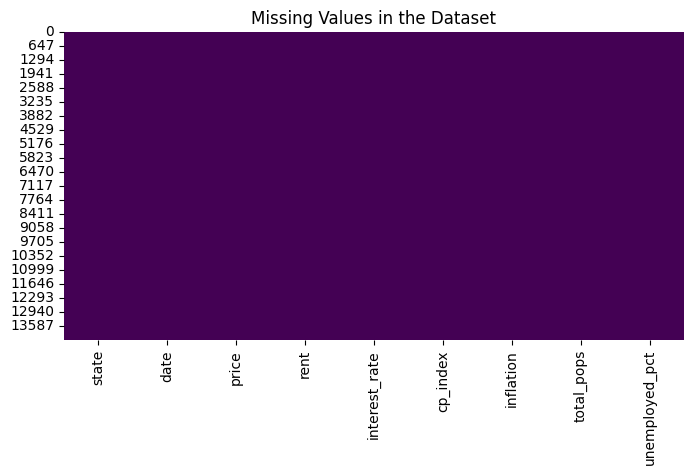

In [9]:
# Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Dataset')
plt.show()

In [10]:
# Display descriptive statistics
print(df.describe(include='all'))

        state                           date          price          rent  \
count   14232                          14232   14232.000000  14232.000000   
unique     50                            NaN            NaN           NaN   
top        AK                            NaN            NaN           NaN   
freq      291                            NaN            NaN           NaN   
mean      NaN  2012-05-15 17:00:30.354131712  222667.929803    915.904232   
min       NaN            2000-02-01 00:00:00   70925.308402  -3034.583871   
25%       NaN            2006-06-01 00:00:00  143878.031936    457.765612   
50%       NaN            2012-06-01 00:00:00  191941.522511    937.795741   
75%       NaN            2018-05-01 00:00:00  265830.413112   1332.290173   
max       NaN            2024-04-01 00:00:00  903471.099127   4188.279962   
std       NaN                            NaN  115095.336263    743.755657   

        interest_rate      cp_index     inflation    total_pops  \
count   

### Visualizations to Explore Relationships

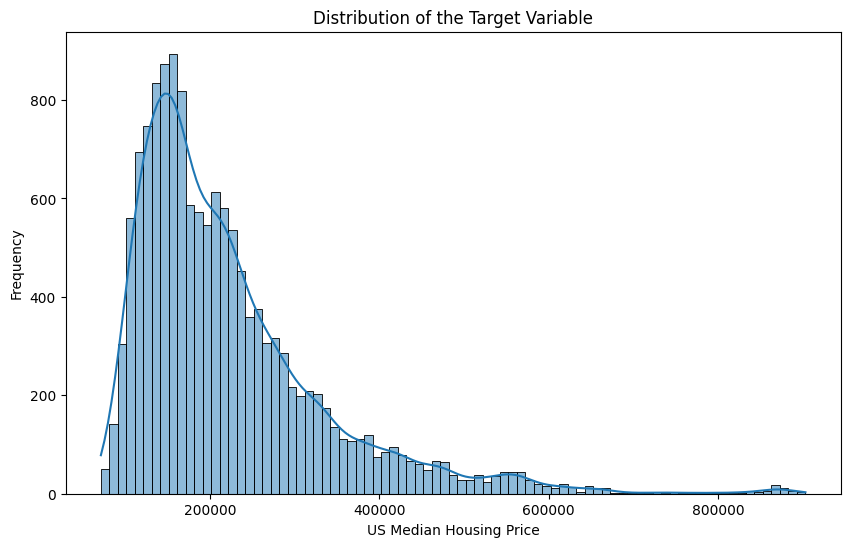

In [13]:
# Histogram of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of the Target Variable')
plt.xlabel('US Median Housing Price')
plt.ylabel('Frequency')
plt.show()


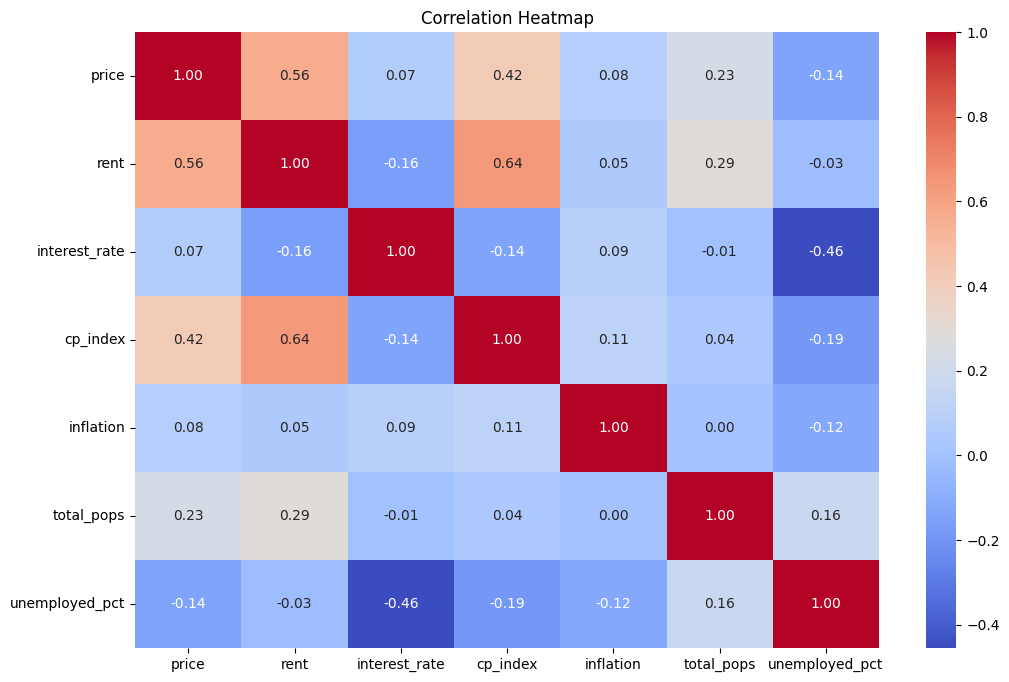

In [15]:
# Compute the correlation matrix
var_to_drop = ['state', 'date']
df_numeric = df.drop(var_to_drop, axis=1)
correlation_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


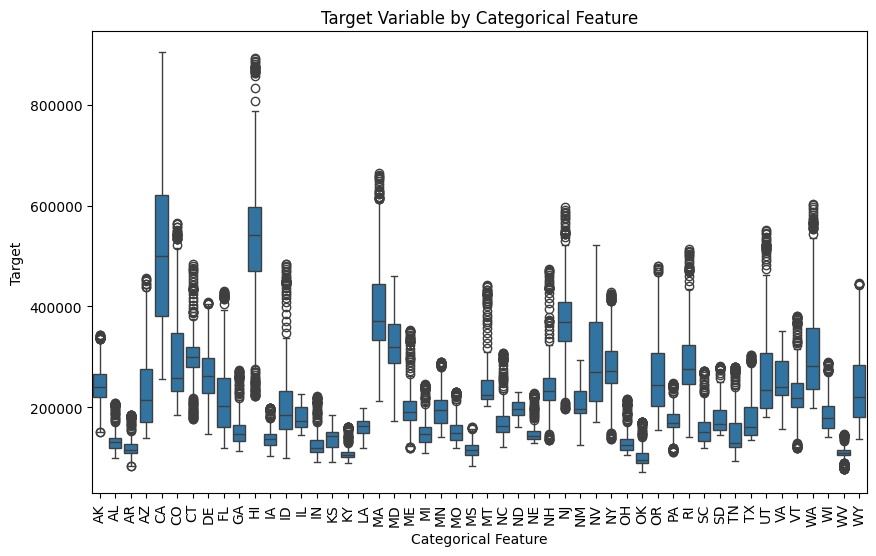

In [18]:
# Box plot of target variable by a categorical feature (if any)
plt.figure(figsize=(10, 6))
sns.boxplot(x='state', y='price', data=df)  # Replace 'categorical_feature' with the actual column name
plt.xticks(rotation=90)  # Rotate x labels
plt.title('Target Variable by Categorical Feature')
plt.xlabel('Categorical Feature')
plt.ylabel('Target')
plt.show()


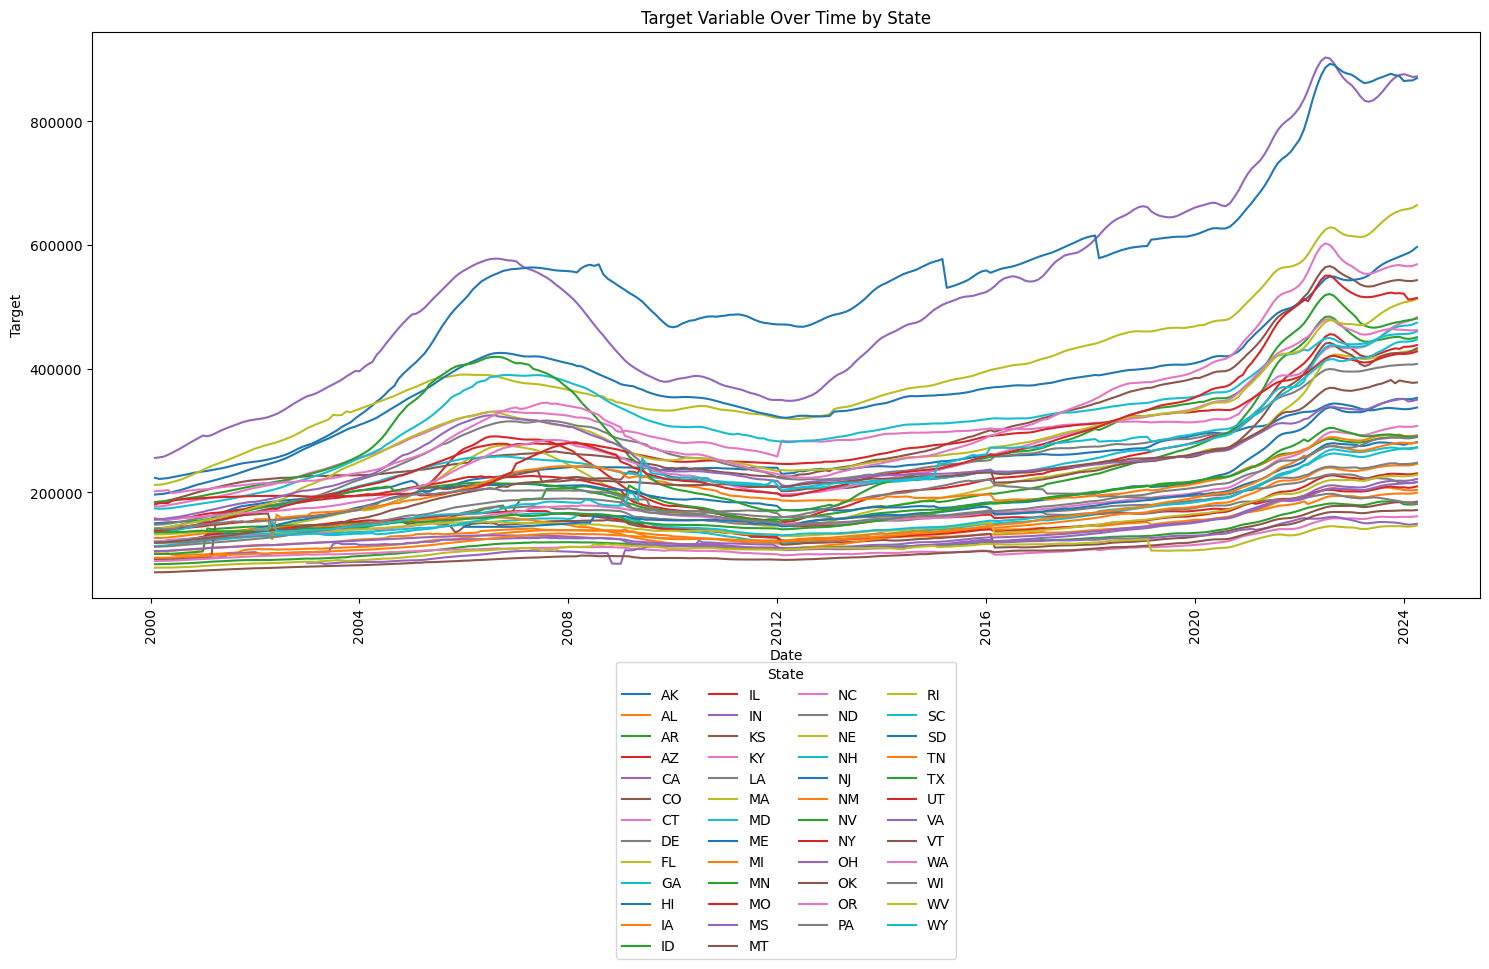

In [22]:
# Time series plot of the target variable
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure that 'state' is treated as a categorical variable
df['state'] = df['state'].astype('category')

# Plot the target variable over time for each state
plt.figure(figsize=(15, 10))
states = df['state'].unique()
for state in states:
    state_data = df[df['state'] == state]
    plt.plot(state_data['date'], state_data['price'], label=state)

plt.title('Target Variable Over Time by State')
plt.xlabel('Date')
plt.ylabel('Target')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.legend(title='State', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4) # Place legend at the bottom
plt.tight_layout()
plt.show()


C:\Users\jyuba\AppData\Local\Temp\ipykernel_11864\777736959.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_avg = df.groupby('state')['price'].mean().reset_index()


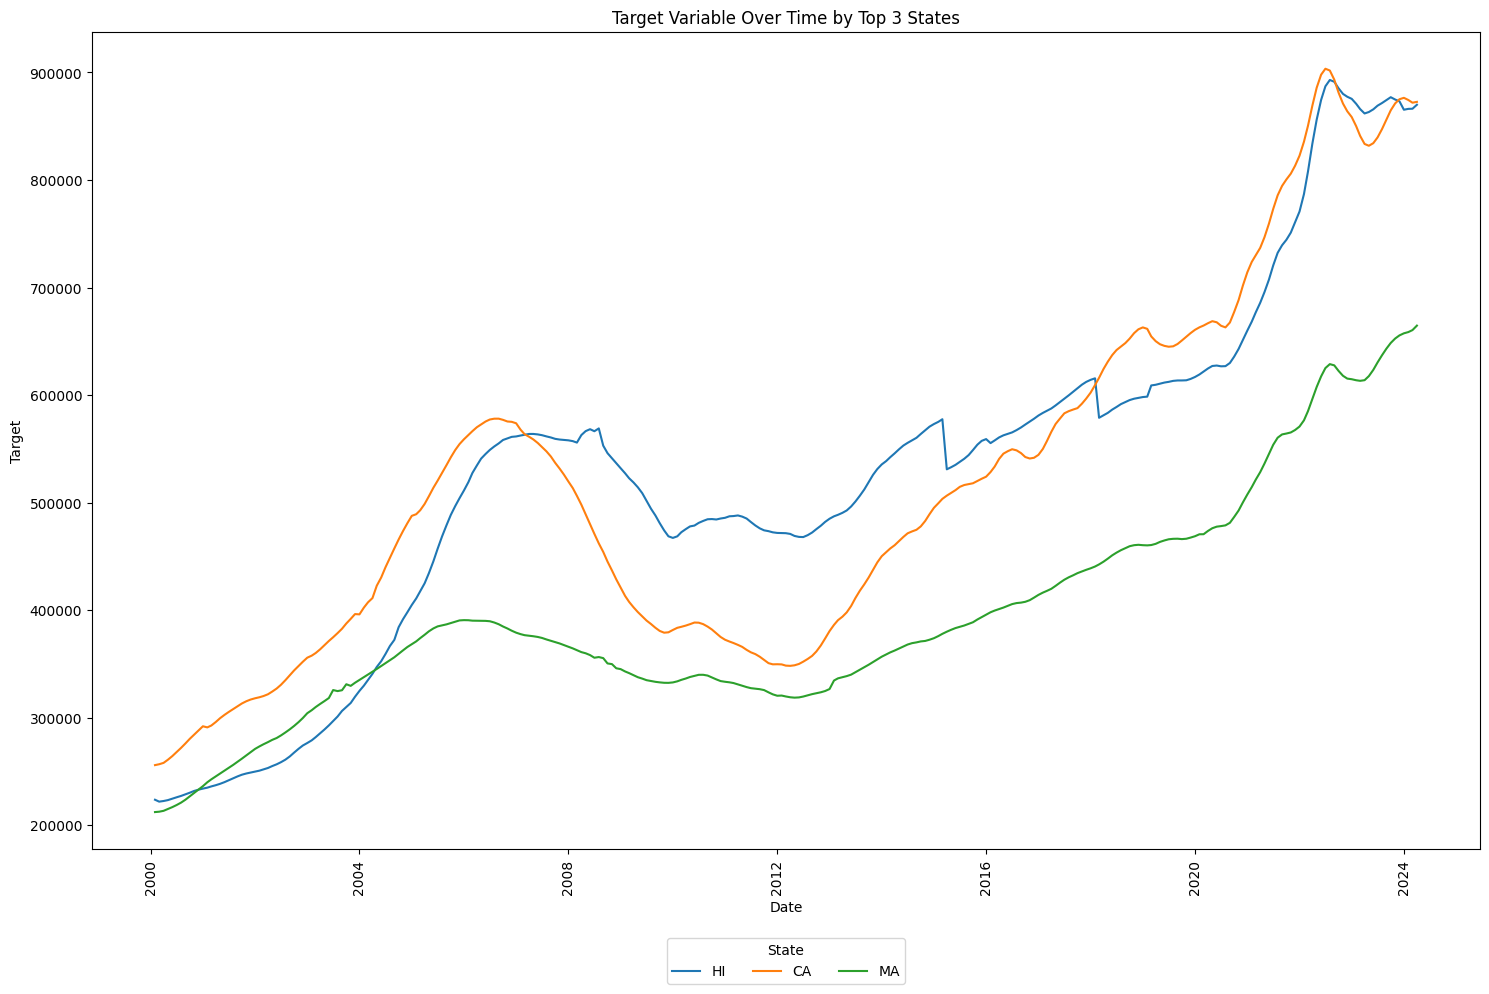

In [24]:
# Calculate the average target value for each state
state_avg = df.groupby('state')['price'].mean().reset_index()

# Select the top 10 states with the highest average target values
top_3_states = state_avg.nlargest(3, 'price')['state']

# Plot the target variable over time for the top 10 states
plt.figure(figsize=(15, 10))
for state in top_3_states:
    state_data = df[df['state'] == state]
    plt.plot(state_data['date'], state_data['price'], label=state)

plt.title('Target Variable Over Time by Top 3 States')
plt.xlabel('Date')
plt.ylabel('Target')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.legend(title='State', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)
plt.tight_layout()
plt.show()


# Data Preprocessing

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

### Data Cleaning and Preprocessing

In [157]:
df = pd.read_csv('data.csv', parse_dates=['date'])

In [158]:
# Extract date features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Drop the original date column
df_processed = df.drop('date', axis=1)

# Define features and target
X = df_processed.drop('price', axis=1)
y = df_processed['price']

# List of numeric features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

# List of categorical features
categorical_features = ['state']

# Preprocessing for numeric data: Impute missing values and scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: One-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocessing and model training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Preprocess the data
X_processed = pipeline.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Training and testing sets created successfully.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Training and testing sets created successfully.
Shape of X_train: (11385, 56)
Shape of X_test: (2847, 56)
Shape of y_train: (11385,)
Shape of y_test: (2847,)


* Linear Regression:
    * Description: Linear regression is a simple and interpretable model that assumes a linear relationship between the independent variables and the target variable.
    * Strengths: It is easy to implement and interpret, works well with linearly separable data, and provides a good baseline for comparison with more complex models.
    * Weaknesses: It may underperform if there are non-linear relationships or interactions between variables.

* Random Forest Regressor:
    * Description: Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the average prediction of the individual trees.
    * Strengths: It can capture non-linear relationships and interactions between features, handles large datasets well, and is less prone to overfitting than individual decision trees.
    * Weaknesses: It can be computationally intensive and less interpretable than linear models.

* XGBoost (Extreme Gradient Boosting):
    * Description: XGBoost is an advanced implementation of gradient boosting that is efficient, flexible, and capable of handling various data types and structures.
    * Strengths: It provides high prediction accuracy, handles missing values well, and has various hyperparameters that can be tuned for performance optimization.
    * Weaknesses: It requires careful tuning of hyperparameters and can be computationally intensive.

In [31]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [32]:
# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}

In [33]:
# Function to evaluate models using cross-validation
def evaluate_model(model, X, y):
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
    return np.mean(-cv_scores), np.std(-cv_scores)

In [34]:
# Evaluate each model
results = {}
for name, model in models.items():
    mean_score, std_score = evaluate_model(model, X_train, y_train)
    results[name] = (mean_score, std_score)
    print(f"{name} - Mean MAE: {mean_score:.4f}, Std MAE: {std_score:.4f}")


Linear Regression - Mean MAE: 30893.8602, Std MAE: 708.6062
Random Forest - Mean MAE: 2141.3575, Std MAE: 93.8114
XGBoost - Mean MAE: 4636.4156, Std MAE: 127.6968


In [35]:
# Train and predict with the best model (example with Random Forest)
best_model = models['Random Forest']
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluation of the best model on the test set
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Test MAE: {mae:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R-squared: {r2:.4f}")

Test MAE: 1817.7386
Test RMSE: 4093.8612
Test R-squared: 0.9988


# Visualize the results

### Scatter Plot of Actual vs. Predicted Values

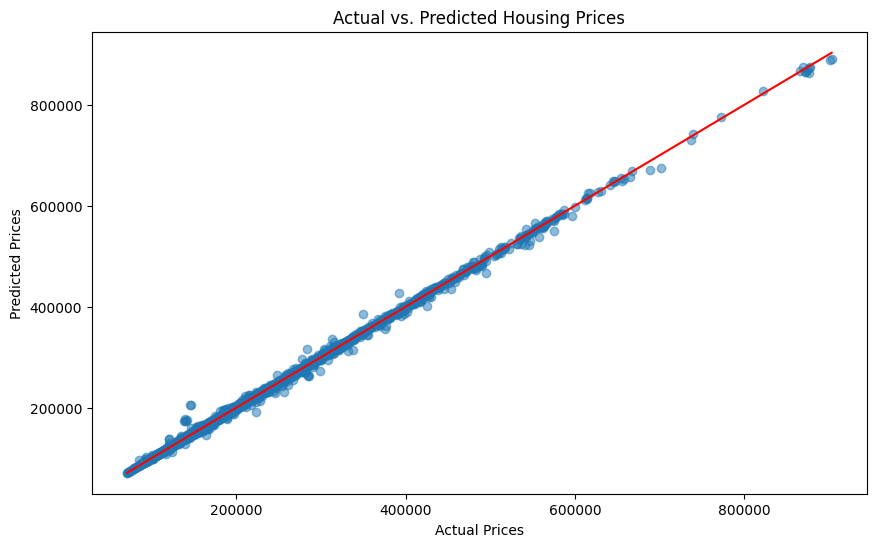

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # 45-degree line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Housing Prices')
plt.show()

Each point represents a data point from the test set, with the actual housing price on the x-axis and the predicted housing price on the y-axis. The red line represents the ideal scenario where predicted values perfectly match the actual values. Points falling on this line indicate perfect predictions.

Since most points lie close to the red line, it suggests that the model's predictions are accurate. Points deviating significantly from the line indicate prediction errors. The spread of points around the line shows the model's accuracy; a tight cluster around the line suggests high accuracy, while a wide spread indicates lower accuracy.

### Residual Plot

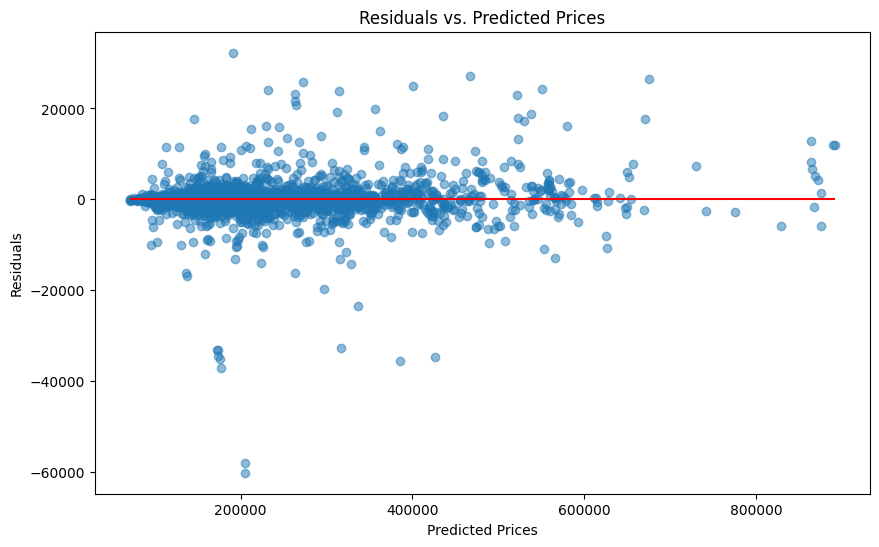

In [38]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(0, min(y_pred), max(y_pred), colors='red')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Prices')
plt.show()

Each point represents a data point, with the predicted price on the x-axis and the residual (actual - predicted) on the y-axis. The red line at zero represents perfect predictions. Residuals above the line indicate overestimation, while residuals below indicate underestimation.

A random scatter of points around the horizontal line suggests that residuals are randomly distributed, indicating that the model captures the underlying data patterns well.
Patterns or trends (e.g., a systematic curve) in the residuals may suggest that the model is missing some underlying structure in the data, which doesnt show in this graph.
Large residuals indicate significant prediction errors, highlighting potential outliers or areas where the model performs poorly, however they are not observed in this graph.

### Histogram of Residuals

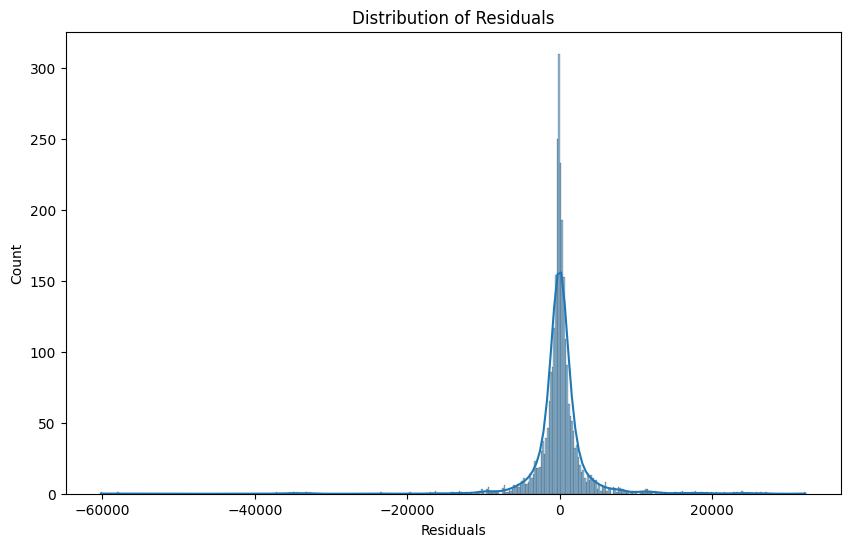

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()


The histogram displays the distribution of residuals (prediction errors). The smooth curve overlaid on the histogram (Kernel Density Estimate) represents the estimated probability density function of the residuals.

A symmetric distribution centered around zero indicates that the model's predictions are unbiased on average. Skewness in the distribution suggests that the model tends to overestimate or underestimate systematically. The spread of the residuals provides insight into the model's accuracy. A narrow spread indicates consistent predictions, while a wide spread indicates more variability in the prediction errors.

The graph shows the model is accuate and consistent in predictions.

In [60]:
# Export the model for the future use
import joblib
joblib.dump(best_model, 'housing_price_model.pkl')

['housing_price_model.pkl']

# Appendix: Predict Future Median Housing Price for top 10 States

In [61]:
model = joblib.load('housing_price_model.pkl')

In [179]:
# Calculate the latest mean values for each state
latest_data = df.sort_values(by='date').groupby('state').tail(12)  # Assuming monthly data, take the last year for each state
state_means = latest_data.groupby('state').mean().reset_index()

In [183]:
state_means.count()

state             50
date              50
price             50
rent              50
interest_rate     50
cp_index          50
inflation         50
total_pops        50
unemployed_pct    50
year              50
month             50
day               50
dtype: int64

In [213]:
# Generate future data for the next 3 years (36 months) for each state
future_dates = pd.date_range(start='2024-07-01', periods=36, freq='M')
future_data_list = []

for _, row in state_means.iterrows():
    state = row['state']
    future_data = pd.DataFrame({
        'date': future_dates,
        'state': [state] * 36,
        'rent': np.linspace(row['rent'], row['rent'] + 300, 36),  # Assume rent increases linearly
        'interest_rate': np.linspace(row['interest_rate'], row['interest_rate'] - 0.5, 36),  # Assume slight increase
        'cp_index': np.linspace(row['cp_index'], row['cp_index'] + 10, 36),  # Assume CPI grows linearly
        'inflation': np.linspace(row['inflation'], row['inflation'] + 0.1, 36),  # Assume inflation grows linearly
        'total_pops': np.linspace(row['total_pops'], row['total_pops'] + 300000, 36),  # Assume population growth
        'unemployed_pct': np.linspace(row['unemployed_pct'], row['unemployed_pct'] - 0.5, 36)  # Assume slight decrease in unemployment
    })
    future_data_list.append(future_data)

# Combine all state data into a single DataFrame
future_data = pd.concat(future_data_list, ignore_index=True)
print(future_data.shape)


(1800, 8)


C:\Users\jyuba\AppData\Local\Temp\ipykernel_11864\626853042.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2024-07-01', periods=36, freq='M')


In [214]:
# Extract date features
future_data['year'] = future_data['date'].dt.year
future_data['month'] = future_data['date'].dt.month
future_data['day'] = future_data['date'].dt.day

# Drop the original date column
future_data_processed = future_data.drop('date', axis=1)

# Define features and target
X_future = future_data_processed #.drop('price', axis=1)
#y = df_processed['price']

# List of numeric features
numeric_features = X_future.select_dtypes(include=['int64', 'float64']).columns

# List of categorical features
categorical_features = ['state']

# Preprocessing for numeric data: Impute missing values and scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: One-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocessing and model training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Preprocess the data
X_future_processed = pipeline.fit_transform(X_future)

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Training and testing sets created successfully.")
print("Shape of X_train:", X_future_processed.shape)


Training and testing sets created successfully.
Shape of X_train: (1800, 56)


In [218]:
# Predict future housing prices
future_predictions = best_model.predict(X_future_processed)

# Add predictions to future data
future_data['Predicted_Median_Housing_Price'] = future_predictions

In [222]:
def get_top_n_states(future_data, n=5):
    # Calculate the average predicted median housing price for each state
    avg_prices = future_data.groupby('state')['Predicted_Median_Housing_Price'].mean().sort_values(ascending=False)
    # Select the top n states
    top_n_states = avg_prices.head(n).index
    return top_n_states

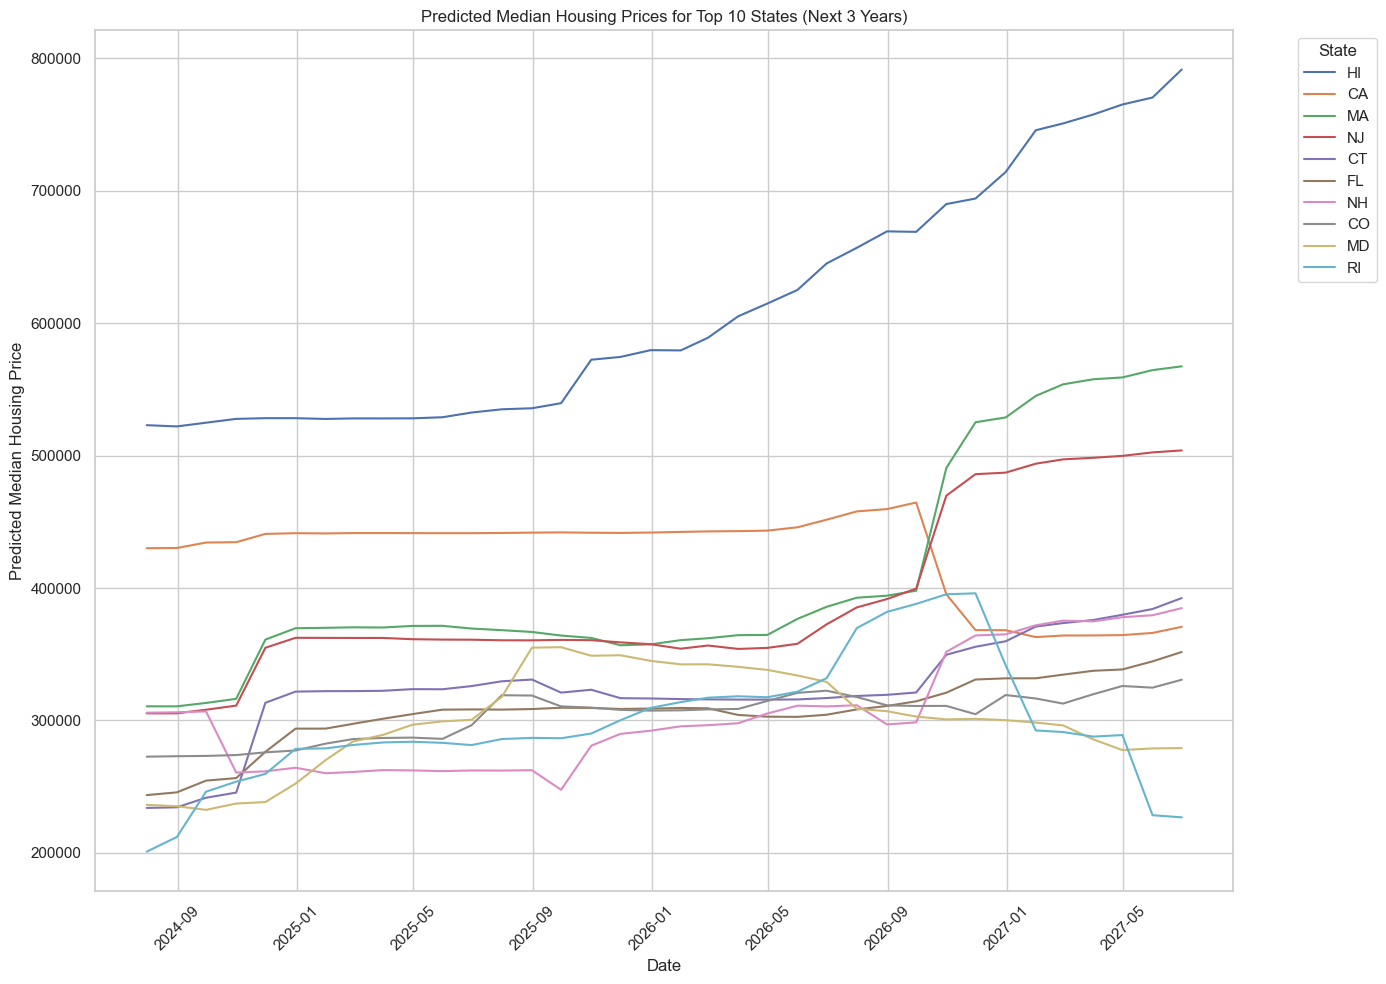

In [224]:
# Define the number of top states to visualize
n = 10

# Get the top n states
top_n_states = get_top_n_states(future_data, n)

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a plot for the top n states
plt.figure(figsize=(14, 10))

# Plot each of the top n states' predicted housing prices
for state in top_n_states:
    state_data = future_data[future_data['state'] == state]
    plt.plot(state_data['date'], state_data['Predicted_Median_Housing_Price'], label=state)

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Predicted Median Housing Price')
plt.title(f'Predicted Median Housing Prices for Top {n} States (Next 3 Years)')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


* Model Selection:
    * Question: Why did you choose the specific machine learning algorithms (e.g., Linear Regression, Random Forest, XGBoost) for this project?
    * Answer: I chose these algorithms because they are well-suited for regression tasks, can handle non-linear relationships and interactions between features, and are known for their robustness and accuracy. Random Forest is great for reducing overfitting compared to individual decision trees, and XGBoost offers advanced gradient boosting techniques that improve prediction accuracy.

* Data Preprocessing:
    * Question: Can you explain the data preprocessing steps and why they are necessary?
    * Answer: Data preprocessing steps included handling missing values, scaling numeric features, and one-hot encoding categorical variables. These steps ensure that the data is clean, standardized, and suitable for training machine learning models, which typically require numeric input and perform better with scaled data.

* Feature Importance:
    * Question: Which features were found to be the most important in predicting housing prices?
    * Answer: Features such as interest rates, rent, CPI (Consumer Price Index), inflation rate, total population, and unemployment rate were significant. Their importance was determined by the feature importance scores provided by the Random Forest and XGBoost models, which help to identify the most influential predictors.

* Model Evaluation:
    * Question: How did you evaluate the performance of your model, and what metrics did you use?
    * Answer: The model performance was evaluated using R-squared, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). R-squared indicates the proportion of variance explained by the model, while MAE, MSE, and RMSE provide insights into the average magnitude of prediction errors.

* Handling Overfitting:
    * Question: What steps did you take to ensure the model does not overfit the training data?
    * Answer: To prevent overfitting, I used techniques such as cross-validation, hyperparameter tuning, and ensemble methods like Random Forest and XGBoost. Additionally, I evaluated the model performance on a separate test dataset to ensure it generalizes well to unseen data.

* Future Data Generation:
    * Question: How did you generate the future data for the predictions?
    * Answer: Future data was generated using the latest mean values of key features for each state, and assuming linear trends for variables such as rent, interest rate, CPI, inflation, population growth, and unemployment rate over the next 3 years.

* R-squared Value:
    * Question: An R-squared value of 0.9988 is very high. Could this indicate overfitting, and how did you address it?
    * Answer: Yes, a very high R-squared value could indicate overfitting. To address this, I used cross-validation and tested the model on separate test data. I also examined other performance metrics like MAE and RMSE to ensure the model's predictions are accurate and generalizable.

* Real-World Applicability:
    * Question: How can this model be applied in real-world scenarios by stakeholders in the housing market?
    * Answer: This model can be used by real estate investors, policymakers, and financial institutions to forecast housing prices, inform investment decisions, and develop housing policies. Accurate predictions help stakeholders anticipate market trends and make data-driven decisions.

* Assumptions and Limitations:
    * Question: What assumptions did you make during this project, and what are the limitations of your model?
    * Answer: Assumptions include linear trends in future data and constant economic conditions. Limitations include potential inaccuracies in predictions if market conditions change abruptly or if important features are missing from the model. The model's reliance on historical data also means it may not fully capture future market dynamics.

* Ethical Considerations:

    * Question: What ethical considerations did you take into account while developing this model?
    * Answer: Ethical considerations included ensuring data privacy and avoiding bias in the model. I made sure to use publicly available data and anonymized datasets. Additionally, I assessed the model for potential biases that could unfairly affect certain regions or demographics, striving for fair and equitable predictions.